In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import os
from datetime import datetime
import re
import sys
sys.path.append('../src/')

import fasttext
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
import seaborn as sns
sns.set_theme()

from data_processor import PostProcessor

In [3]:
BASE_DATA_PATH = "/data/ddmg/personalizedmentalhealth/reddit_project/data"

In [6]:
LANG_ID_MODEL_PATH = "/data/ddmg/personalizedmentalhealth/reddit_project/tools/lid.176.bin"

# Load data and apply text preprocessing steps

In [4]:
subreddits = os.listdir(BASE_DATA_PATH)
subreddits

['Family',
 'investing',
 'relationships',
 'medical',
 'mentalhealth',
 'bitcoin',
 'AskDocs',
 'relationship_advice',
 'personalfinance']

In [8]:
# create processed dataframes
df_list = []
text_df_list = []
for sr in subreddits:
    print("Processing Posts in Subreddit: {}".format(sr))
    data_dir = os.path.join(BASE_DATA_PATH, sr, "posts")
    data_path = os.path.join(data_dir, "all.csv")
    pp = PostProcessor(data_path)
    filtered_id_path = os.path.join(data_dir, "1_filtered_ids.npy")
    filtered_ids = np.load(filtered_id_path, allow_pickle=True)
    data_df = pp.data_df[pp.data_df["id"].isin(filtered_ids)]
    print("len of data df after exclusion criteria {}".format(len(data_df)))
    df_list.append(data_df)
    text_df = pp.preprocess_text(LANG_ID_MODEL_PATH, data_dir, filtered_ids)
    text_df_list.append(text_df)
    print()

Processing Posts in Subreddit: Family
len of data df after exclusion criteria 11578
starting processing of post text
initial dataset size is 11578
322 posts=2.781136638452237% removed because have URL ratio > 0.04
24 posts=0.21321961620469082% removed because contain table
30 posts=0.2670940170940171% removed because are not English
194 posts=1.7318336011426532% removed because are not English
final post count: 11008

Processing Posts in Subreddit: investing
len of data df after exclusion criteria 72747
starting processing of post text
initial dataset size is 72747
5499 posts=7.5590746010144745% removed because have URL ratio > 0.04
511 posts=0.759873899595527% removed because contain table
8 posts=0.011987353342223953% removed because are not English
1417 posts=2.123514513929476% removed because are not English
final post count: 65312

Processing Posts in Subreddit: relationships
len of data df after exclusion criteria 277011
starting processing of post text
initial dataset size is 27

In [26]:
# get earlier dataframes
og_list = []
for sr in subreddits:
    print("Processing Posts in Subreddit: {}".format(sr))
    data_dir = os.path.join(BASE_DATA_PATH, sr, "posts")
    data_path = os.path.join(data_dir, "all.csv")
    pp = PostProcessor(data_path)
    og_list.append(pp.data_df)

Processing Posts in Subreddit: Family
Processing Posts in Subreddit: investing
Processing Posts in Subreddit: relationships
Processing Posts in Subreddit: medical
Processing Posts in Subreddit: mentalhealth
Processing Posts in Subreddit: bitcoin
Processing Posts in Subreddit: AskDocs
Processing Posts in Subreddit: relationship_advice
Processing Posts in Subreddit: personalfinance


In [27]:
og_df = pd.concat(og_list)
filtered_df = pd.concat(df_list)

In [28]:
print(len(og_df), len(filtered_df), len(text_df))

4612154 1409039 1379459


In [31]:
text_ids = set(text_df["id"])
filtered_ids = set(filtered_df["id"])

In [32]:
# add column indicating when/if post was dropped
def check_id(post_id):
    if post_id in text_ids:
        return "final"
    if post_id in filtered_ids:
        return "filtered"
    return "original"

In [33]:
og_df["data_version"] = og_df["id"].apply(lambda x: check_id(x))

In [36]:
og_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,preview,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data,data_version
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,"Mother is visiting for 2-weeks, can't read her...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,My sister is slowly killing my father. How can...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,Easily find fun local events to do with your k...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,final
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,My boyfriend's family is crazy and I'm pregnant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94685,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[deleted],[],False,NaN,0,False,Can someone explain what these partial mortage...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
94686,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[removed],[],False,NaN,0,False,What to do with 150k inheritance want to gener...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original
94687,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN,final
94688,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[deleted],[],False,NaN,1,False,Is there a way to be disabled and still make a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,original


In [39]:
og_df.dropna(subset=["subreddit"], inplace=True)

In [41]:
og_df["data_version"].value_counts()

original    3203111
final       1379459
filtered      29580
Name: data_version, dtype: int64

# Examine dataset makeup by subreddit, user, and the intersection between these

In [9]:
full_df = pd.concat(df_list)

In [10]:
text_df = pd.concat(text_df_list)

In [14]:
len(text_df)

1379459

In [12]:
full_df = full_df.merge(text_df, how="inner", on="id")

In [13]:
full_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,preview,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data,text
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My Mum is acting really weird. This is weird b...
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"Hi Everyone! I'm Jay 13 years old, I have a pr...",[],False,NaN,0,False,Awkward Situations w/ My Dad?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Awkward Situations w/ My Dad? Hi Everyone! I'm...
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"So, yesterday I was helping my mother with her...",[],False,NaN,0,False,Just found out my father isn't my father (afte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just found out my father isn't my father (afte...
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"A public letter to my mother, Bonnie (aka Ambe...",[],False,NaN,0,False,Our mother left her family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Our mother left her family A public letter to ...
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,So my sister has 2 kids and is pregnant with a...,[],False,NaN,0,False,"Sister's shit of a ""man""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sister's shit of a ""man"" So my sister has 2 ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379454,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Im hoping for some thoughts about my financial...,[],False,NaN,0,False,"HELP! ""Large"" savings account, pay down debt o...",...,NaN,NaN,NaN,NaN,NaN,1c57f8a6-c078-11e4-9e41-22000b39cb96,NaN,NaN,NaN,"HELP! ""Large"" savings account, pay down debt o..."
1379455,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[https://imgur.com/zzbihK9](https://imgur.com/...,[],False,NaN,0,False,Help me understand my statement balance?,...,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Help me understand my statement balance? [http...
1379456,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,I have an old HSA from old employer and it's c...,[],False,NaN,0,False,HSA Account Fees,...,NaN,NaN,NaN,NaN,NaN,2361ec24-c078-11e4-acc1-22000b290247,NaN,NaN,NaN,HSA Account Fees I have an old HSA from old em...
1379457,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN,Am I (son) responsible for my deceased father'...


## Counts by Subreddit

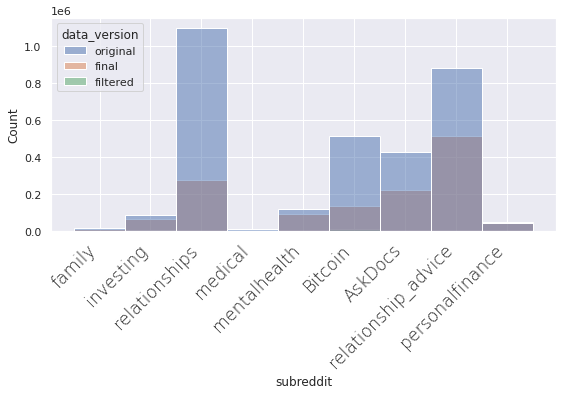

In [40]:
# counts by subreddit
plt.figure(figsize=(8,4))
sns.histplot(data=og_df, x="subreddit", hue="data_version")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

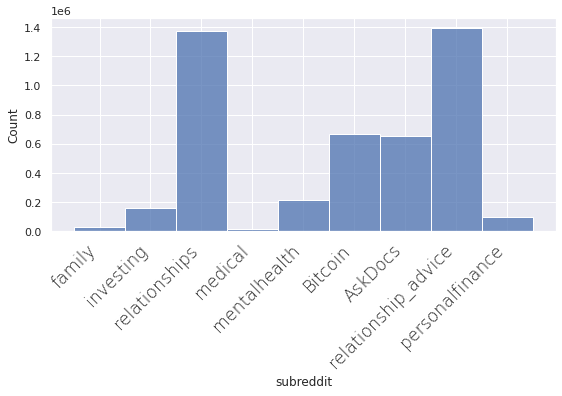

In [43]:
plt.figure(figsize=(8,4))
sns.histplot(data=og_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

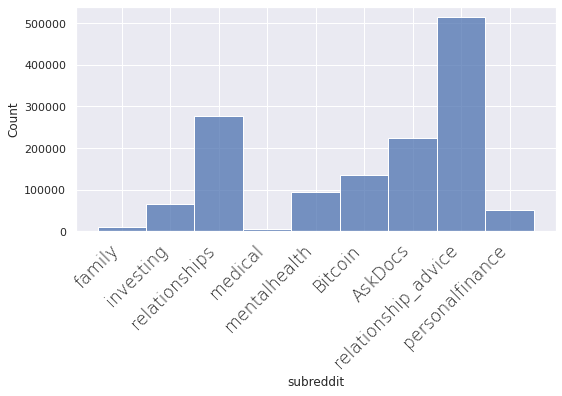

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data=full_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [24]:
# look by category
def get_group(subreddit):
    if subreddit in ["family", "relationships", "relationship_advice"]:
        return "relationships"
    if subreddit in ["investing", "Bitcoin", "personalfinance"]:
        return "finance"
    if subreddit in ["medical", "mentalhealth", "AskDocs"]:
        return "medical"
    return "NONE"

full_df["subreddit_group"] = full_df["subreddit"].apply(lambda x: get_group(x))

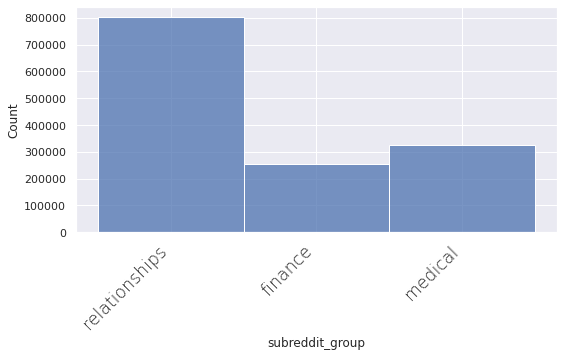

In [25]:
# counts by subreddit
plt.figure(figsize=(8,4))
sns.histplot(data=full_df, x="subreddit_group")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [45]:
full_df[["id", "subreddit"]].groupby(by="subreddit").count()

,id
subreddit,
AskDocs,224743
Bitcoin,136146
family,11008
investing,65312
medical,5186
mentalhealth,95277
personalfinance,51264
relationship_advice,513728
relationships,276795


In [46]:
len(full_df)

1379459

In [48]:
full_df[["id", "subreddit_group"]].groupby(by="subreddit_group").count()

,id
subreddit_group,
finance,252722
medical,325206
relationships,801531


# Counts by user

In [86]:
user_counts = full_df[["id", "author"]].groupby(by="author").count()

In [87]:
user_counts["id"].mean()

1.4229588521089713

In [88]:
user_counts["id"].std()

3.773467615088284

In [89]:
user_counts.rename(columns={"id": "user_post_count"}, inplace=True)
user_counts

,user_post_count
author,
*polhold00274,3
*tmhold00196,1
----------1,1
-------dingo,1
------___--___------,1
...,...
zzzzzzzzzz7,1
zzzzzzzzzzzzccccccgg,4
zzzzzzzzzzzzzxzzzzzz,1


<AxesSubplot:xlabel='user_post_count', ylabel='Count'>

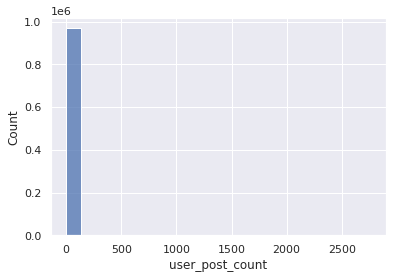

In [90]:
sns.histplot(data=user_counts, x="user_post_count")

<AxesSubplot:xlabel='user_post_count', ylabel='Count'>

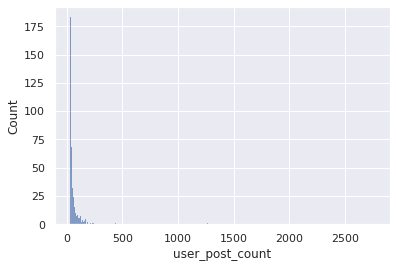

In [95]:
sub_df = user_counts[user_counts["user_post_count"] >= 30]
sns.histplot(sub_df["user_post_count"])

In [96]:
print("{}/{} users have post_count >= 30 = {}%".format(len(sub_df), len(user_counts), len(sub_df)*100/len(user_counts)))
sub_df["user_post_count"].value_counts()

596/969430 users have post_count >= 30 = 0.06147942605448563%


30     38
31     34
35     32
33     29
34     29
       ..
110     1
112     1
123     1
128     1
88      1
Name: user_post_count, Length: 109, dtype: int64

In [50]:
len(set(full_df["author"]))

969430

## Look at only the users that have at least 30 posts

In [91]:
select_authors = user_counts[user_counts["user_post_count"] >= 30]

In [93]:
select_authors["user_post_count"].mean()

62.42785234899329

In [97]:
select_authors["user_post_count"].std()

128.17345061060914

In [98]:
select_authors["user_post_count"].sum()

37207

In [99]:
select_authors

,user_post_count
author,
101111,43
123wanderlust,30
19931,46
1blockologist,56
1gudboi,41
...,...
your_godammn_right,34
zcc0nonA,37
zomgitsduke,37


In [101]:
author_set = set(select_authors.index)

In [103]:
a_df = full_df[full_df["author"].isin(author_set)]

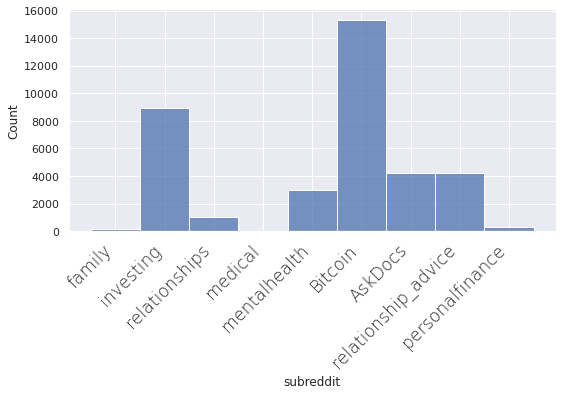

In [105]:
plt.figure(figsize=(8,4))
sns.histplot(data=a_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

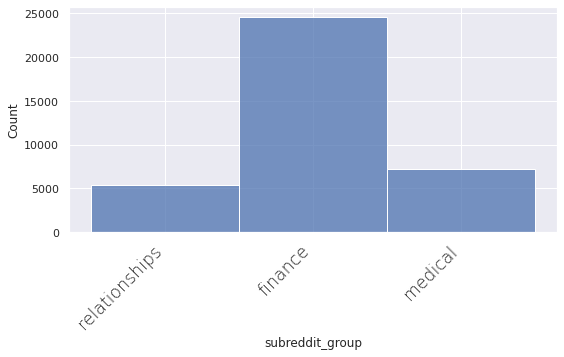

In [106]:
plt.figure(figsize=(8,4))
sns.histplot(data=a_df, x="subreddit_group")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## Compare to user counts for the original dataset

In [77]:
# look for original data
user_counts = og_df[["id", "author"]].groupby(by="author").count()
user_counts

,id
author,
*polhold00274,9
*tmhold00193,1
*tmhold00196,1
-----------------www,8
----------1,1
...,...
zzzzzzzzzzzzzxzzzzzz,1
zzzzzzzzzzzzzzzx,2
zzzzzzzzzzzzzzzzz1,1


In [78]:
user_counts["id"].mean()

1.7285220309183134

In [79]:
user_counts["id"].std()

9.655610063419461

In [80]:
user_counts.rename(columns={"id": "user_post_count"}, inplace=True)

<AxesSubplot:xlabel='user_post_count', ylabel='Count'>

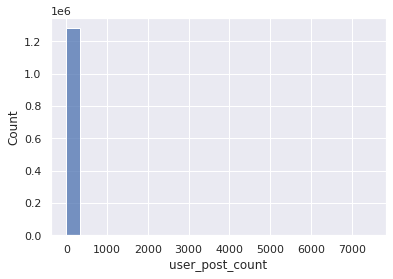

In [81]:
sns.histplot(data=user_counts, x="user_post_count")

In [85]:
sub_df = user_counts[user_counts["user_post_count"] >= 5]
print("{}/{} users have post_count >= 5 = {}%".format(len(sub_df), len(user_counts), len(sub_df)*100/len(user_counts)))
sub_df["user_post_count"].value_counts()

48145/1280859 users have post_count >= 5 = 3.7588056140449497%


5      13669
6       8328
7       5368
8       3717
9       2796
       ...  
336        1
240        1
176        1
112        1
207        1
Name: user_post_count, Length: 310, dtype: int64

# Examining subreddit distribution for each user

In [108]:
# just look at users in the select user group that has at least 30 posts
ur_counts = a_df[["id", "author", "subreddit"]].groupby(by=["author", "subreddit"]).count()

In [122]:
display(ur_counts)

id
author             subreddit       
101111             Bitcoin       43
123wanderlust      AskDocs        2
                   investing     28
19931              AskDocs        4
                   mentalhealth  42
...                              ..
your_godammn_right mentalhealth  33
zcc0nonA           Bitcoin       37
zomgitsduke        Bitcoin       37
ztsmart            Bitcoin       46
zuelearth          investing     37

[1018 rows x 1 columns]

In [115]:
user_sr_counts = ur_counts.groupby(level=0).size()

In [116]:
user_sr_counts

author
101111                1
123wanderlust         2
19931                 2
1blockologist         2
1gudboi               1
                     ..
your_godammn_right    2
zcc0nonA              1
zomgitsduke           1
ztsmart               1
zuelearth             1
Length: 596, dtype: int64

In [117]:
user_sr_counts.value_counts()

1    349
2    136
3     66
4     32
5      8
6      4
7      1
dtype: int64

In [121]:
349 / 596

0.5855704697986577

In [118]:
user_sr_counts[user_sr_counts == 7]

author
MakeupMua16    7
dtype: int64

In [124]:
a2 = user_sr_counts[user_sr_counts > 1].index

In [126]:
a2

Index(['123wanderlust', '19931', '1blockologist', '7bitcoin',
       'Adiozatwozerofive', 'AmericanMare', 'AnimatedPie', 'AnnaOrnala',
       'Anynon1', 'AnythingForSuccess',
       ...
       'vroomDotClub', 'vulcan_on_earth', 'water193', 'wesred',
       'wickawickawacha', 'wsace', 'wsdpii', 'xPoW3Rx', 'yogibreakdance',
       'your_godammn_right'],
      dtype='object', name='author', length=247)

In [120]:
a_df[a_df["author"] == "MakeupMua16"]["subreddit"].value_counts()

relationship_advice    76
AskDocs                24
family                 13
relationships           3
personalfinance         2
medical                 1
mentalhealth            1
Name: subreddit, dtype: int64

In [128]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(ur_counts.loc[a2])

id
author               subreddit                
123wanderlust        AskDocs                 2
                     investing              28
19931                AskDocs                 4
                     mentalhealth           42
1blockologist        Bitcoin                55
                     investing               1
7bitcoin             AskDocs                 1
                     Bitcoin                22
                     investing               7
Adiozatwozerofive    AskDocs                47
                     mentalhealth            1
AmericanMare         AskDocs                 1
                     mentalhealth           37
                     relationship_advice     1
AnimatedPie          AskDocs                 3
                     mentalhealth            8
                     relationship_advice    13
                     relationships          15
AnnaOrnala           mentalhealth            2
                     relationship_advice    88
                     relationships          70
Anynon1              relationship_advice    44
                     relationships           2
AnythingForSuccess   AskDocs                 1
                     Bitcoin                22
                     investing              34
Austins-Reddit       Bitcoin                 3
                     investing               7
                     personalfinance        29
                     relationship_advice     3
AutoModerator        AskDocs               103
                     Bitcoin                 9
                     investing            2278
                     personalfinance        37
                     relationship_advice   335
BRoccoli20           AskDocs                 1
                     mentalhealth           35
Bad_Wulph            AskDocs                44
                     mentalhealth           10
                     relationship_advice     1
Beast_and_the_harlot AskDocs                 2
                     mentalhealth           33
BillNye69            Bitcoin                 1
                     investing              27
                     personalfinance         2
                     relationship_advice     1
BlackMathNerd        relationship_advice    15
                     relationships          19
BodyweightD00D       AskDocs                 1
                     Bitcoin                38
BrainDamageLDN       Bitcoin                93
                     investing               1
BrokelynNYC          AskDocs                 3
                     Bitcoin                 1
                     investing              52
                     relationship_advice     1
ChrisStoneGermany    Bitcoin                33
                     investing               5
Creative310          AskDocs                 9
                     Bitcoin                25
                     relationship_advice     1
CreeyoLeelo          mentalhealth           19
                     relationship_advice    15
CrystalandtheGems    AskDocs                18
                     mentalhealth           13
                     relationship_advice     1
Daniel_128           mentalhealth           30
                     relationship_advice     1
Darksilverbuttons    AskDocs                 2
                     relationship_advice    25
                     relationships           5
Deadmanjustice       AskDocs                37
                     mentalhealth            5
                     relationship_advice     1
DeeDee_Z             AskDocs                 1
                     investing              32
Denizyzz             AskDocs                29
                     relationship_advice    11
                     relationships           1
Docquest117          AskDocs                41
                     medical                 4
DogtorPepper         AskDocs                 1
                     investing               9
                     personalfinance        19
  